In [55]:
import pandas as pd
df=pd.read_csv('data.csv')

In [56]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
titles=df['title'].tolist()
cleaned_titles=[]
# Define the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Preprocessing function
for text in titles:
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
      
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize each word
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    preprocessed_text = " ".join(tokens)
    
    cleaned_titles.append(preprocessed_text)

# Apply preprocessing to each title in the list

# Add the cleaned titles back to the DataFrame
df['cleaned_title'] = cleaned_titles

# Display the DataFrame
df.head()

,ticker,date,time,title,cleaned_title
0,AMZN,Oct-29-24,12:44PM,Ray Wang on Amazon.com Inc (NASDAQ:AMZN): Stro...,ray wang amazoncom inc nasdaqamzn strong funda...
1,AMZN,Oct-29-24,12:06PM,Duck Capital calls for 'significant' capital r...,duck capital call significant capital return a...
2,AMZN,Oct-29-24,12:00PM,Is an earnings beat enough for Big Tech invest...,earnings beat enough big tech investor
3,AMZN,Oct-29-24,11:37AM,Amazon pilots 'Rufus' generative AI shopping a...,amazon pilot rufus generative ai shopping assi...
4,AMZN,Oct-29-24,11:16AM,"Do Amazon, Alphabet, and Apple Have an AI Spen...",amazon alphabet apple ai spending problem mean...


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF to the 'cleaned_title' column
tfidf_matrix = vectorizer.fit_transform(df['cleaned_title'])

# Convert the TF-IDF matrix to a DataFrame for easier readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print("TF-IDF Scores:\n", tfidf_df)

TF-IDF Scores:
      aapl  aapls  accelerating  access  according  account  accusing  action  \
0     0.0    0.0           0.0     0.0        0.0      0.0       0.0     0.0   
1     0.0    0.0           0.0     0.0        0.0      0.0       0.0     0.0   
2     0.0    0.0           0.0     0.0        0.0      0.0       0.0     0.0   
3     0.0    0.0           0.0     0.0        0.0      0.0       0.0     0.0   
4     0.0    0.0           0.0     0.0        0.0      0.0       0.0     0.0   
..    ...    ...           ...     ...        ...      ...       ...     ...   
495   0.0    0.0           0.0     0.0        0.0      0.0       0.0     0.0   
496   0.0    0.0           0.0     0.0        0.0      0.0       0.0     0.0   
497   0.0    0.0           0.0     0.0        0.0      0.0       0.0     0.0   
498   0.0    0.0           0.0     0.0        0.0      0.0       0.0     0.0   
499   0.0    0.0           0.0     0.0        0.0      0.0       0.0     0.0   

     actually   ad  ...

In [59]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Function to assign sentiment labels
def assign_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0:
        return 'positive'
    else:
        return 'negative'
    

# Apply the function to the 'cleaned_title' column
df['sentiment_label'] = df['cleaned_title'].apply(assign_sentiment)

# Display the DataFrame with sentiment labels
print(df[['cleaned_title', 'sentiment_label']])


                                         cleaned_title sentiment_label
0    ray wang amazoncom inc nasdaqamzn strong funda...        positive
1    duck capital call significant capital return a...        positive
2               earnings beat enough big tech investor        positive
3    amazon pilot rufus generative ai shopping assi...        positive
4    amazon alphabet apple ai spending problem mean...        negative
..                                                 ...             ...
495  microsoft corporation msft gave back first hal...        positive
496  tesla stock tap brake still rising magnificent...        positive
497  betting bitcoin microsofts shareholder decide ...        positive
498     colgatepalmolive centene microsoft stock focus        positive
499  microsoft ceo satya nadella asked pay cut stil...        negative

[500 rows x 2 columns]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['title'])  # Features (TF-IDF vectors)
y = df['sentiment_label']  # Target labels (positive, negative)

# Step 2: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [61]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.30      0.46        10
    positive       0.93      1.00      0.96        90

    accuracy                           0.93       100
   macro avg       0.96      0.65      0.71       100
weighted avg       0.94      0.93      0.91       100



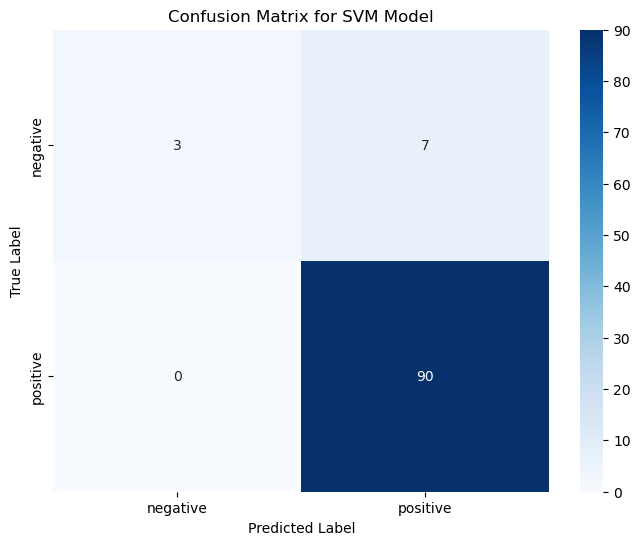

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [63]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred1 = dt_model.predict(X_test)

In [64]:
print("Accuracy:", accuracy_score(y_test, y_pred1))

Accuracy: 0.94


In [65]:
print("Classification Report:\n", classification_report(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.50      0.62        10
    positive       0.95      0.99      0.97        90

    accuracy                           0.94       100
   macro avg       0.89      0.74      0.80       100
weighted avg       0.94      0.94      0.93       100



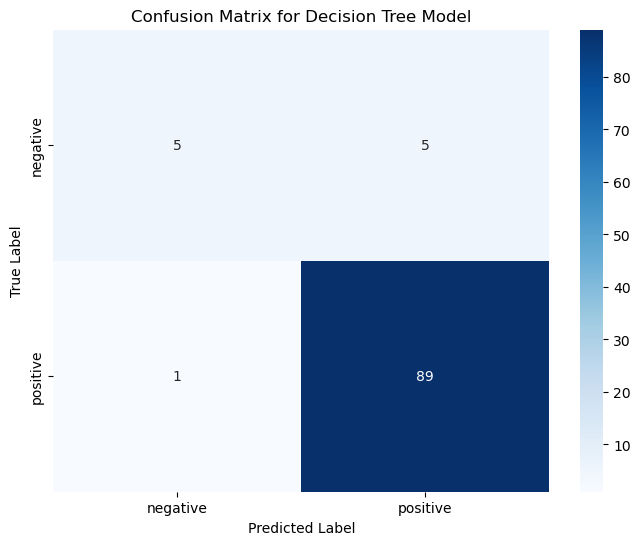

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [67]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
df1=df
label_mapping = {'positive': 1, 'negative': 0}
df1['label'] = df1['sentiment_label'].map(label_mapping)

# Split data
X_train_val, X_test1, y_train_val, y_test1 = train_test_split(df1['title'], df1['label'], test_size=0.2, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train1)

X_train_seq = tokenizer.texts_to_sequences(X_train1)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test1)

# Pad sequences to ensure consistent input size
max_length = 50  # max length for sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Define RNN model
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    SimpleRNN(64),
    Dense(2, activation='softmax')  # Output layer for 2 classes: positive, negative
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_padded, y_train1, epochs=10, batch_size=16, validation_data=(X_val_padded, y_val))

Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 0.3861 - accuracy: 0.8875 - val_loss: 0.5081 - val_accuracy: 0.8375
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3145 - accuracy: 0.9062 - val_loss: 0.4533 - val_accuracy: 0.8375
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3167 - accuracy: 0.9062 - val_loss: 0.4873 - val_accuracy: 0.8375
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3138 - accuracy: 0.9062 - val_loss: 0.4592 - val_accuracy: 0.8375
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3158 - accuracy: 0.9062 - val_loss: 0.4712 - val_accuracy: 0.8375
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3265 - accuracy: 0.9000 - val_loss: 0.4615 - val_accuracy: 0.8375
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3177 - accuracy: 0.9062 - val_loss: 0.4692 - val_accuracy: 0.8375
Epoch 8/10
20/20 [=

In [69]:
# Evaluate RNN
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_padded, y_test1)
print("RNN Test Accuracy:", rnn_accuracy)


4/4 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.9000
RNN Test Accuracy: 0.8999999761581421


In [70]:
from tensorflow.keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    LSTM(64),
    Dense(2, activation='softmax')  # Output layer for 2 classes
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_padded, y_train1, epochs=10, batch_size=16, validation_data=(X_val_padded, y_val))


Epoch 1/10
20/20 [==============================] - 1s 27ms/step - loss: 0.4494 - accuracy: 0.9062 - val_loss: 0.5126 - val_accuracy: 0.8375
Epoch 2/10
20/20 [==============================] - 0s 14ms/step - loss: 0.3175 - accuracy: 0.9062 - val_loss: 0.4656 - val_accuracy: 0.8375
Epoch 3/10
20/20 [==============================] - 0s 14ms/step - loss: 0.3156 - accuracy: 0.9062 - val_loss: 0.4662 - val_accuracy: 0.8375
Epoch 4/10
20/20 [==============================] - 0s 13ms/step - loss: 0.3119 - accuracy: 0.9062 - val_loss: 0.4632 - val_accuracy: 0.8375
Epoch 5/10
20/20 [==============================] - 0s 13ms/step - loss: 0.3149 - accuracy: 0.9062 - val_loss: 0.4535 - val_accuracy: 0.8375
Epoch 6/10
20/20 [==============================] - 0s 13ms/step - loss: 0.3137 - accuracy: 0.9062 - val_loss: 0.4841 - val_accuracy: 0.8375
Epoch 7/10
20/20 [==============================] - 0s 13ms/step - loss: 0.3231 - accuracy: 0.9062 - val_loss: 0.4477 - val_accuracy: 0.8375
Epoch 8/10
20

In [71]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test1)
print("LSTM Test Accuracy:", lstm_accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.2542 - accuracy: 0.9200
LSTM Test Accuracy: 0.9200000166893005


In [72]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#CNN
df2 = df

# Tokenize the titles for Word2Vec training
tokenized_titles = [title.split() for title in df2['title']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_titles, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(tokenized_titles, total_examples=len(tokenized_titles), epochs=10)
import numpy as np

# Initialize the embedding matrix with zeros
vocab_size = 5000  # Limit vocabulary size for tokenizer
embedding_dim = 100  # Embedding dimension size (same as Word2Vec vector size)
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fit tokenizer on the titles for neural network input
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['title'])

# Populate embedding matrix with Word2Vec vectors
for word, idx in tokenizer.word_index.items():
    if idx < vocab_size:  # Ensure the index is within the limit
        try:
            embedding_vector = word2vec_model.wv[word]
            embedding_matrix[idx] = embedding_vector
        except KeyError:
            pass  
Xcnn = tokenizer.texts_to_sequences(df2['title'])
Xcnn_padded = pad_sequences(Xcnn, maxlen=50, padding='post')

# Encode labels
label_mapping = {'positive': 1, 'negative': 0}
ycnn = df2['sentiment_label'].map(label_mapping).values

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split

# Split into training and test sets
Xcnn_train, Xcnn_test, ycnn_train, ycnn_test = train_test_split(Xcnn_padded, ycnn, test_size=0.2, random_state=42)

# Define the model
def build_cnn_lstm_model():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=50, trainable=False),
        Conv1D(128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for 2 classes: positive, negative
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model
cnn_model = build_cnn_lstm_model()
cnn_model.fit(Xcnn_train, ycnn_train, epochs=10, batch_size=16, validation_split=0.2)



Epoch 1/10
20/20 [==============================] - 0s 8ms/step - loss: 0.3779 - accuracy: 0.8781 - val_loss: 0.3413 - val_accuracy: 0.9125
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3540 - accuracy: 0.8875 - val_loss: 0.3564 - val_accuracy: 0.9125
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.8875 - val_loss: 0.3500 - val_accuracy: 0.9125
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3461 - accuracy: 0.8875 - val_loss: 0.3442 - val_accuracy: 0.9125
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.8875 - val_loss: 0.3436 - val_accuracy: 0.9125
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3454 - accuracy: 0.8875 - val_loss: 0.3478 - val_accuracy: 0.9125
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3420 - accuracy: 0.8875 - val_loss: 0.3413 - val_accuracy: 0.9125
Epoch 8/10
20/20 [==

In [73]:
# Evaluate on test data
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(Xcnn_test, ycnn_test)
print("CNN with Word2Vec Test Accuracy:", cnn_test_accuracy)


4/4 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.9000
CNN with Word2Vec Test Accuracy: 0.8999999761581421


Decision Tree gave highest accuracy, now creating data visualizations based on the outcome of Decision Tree

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df_train = df.iloc[:400].copy()
df_test = df.iloc[400:].copy()
df_test['predicted_sentiment'] = y_pred1
df_train['predicted_sentiment'] = df_train['sentiment_label']
df_all = pd.concat([df_train, df_test], ignore_index=True)

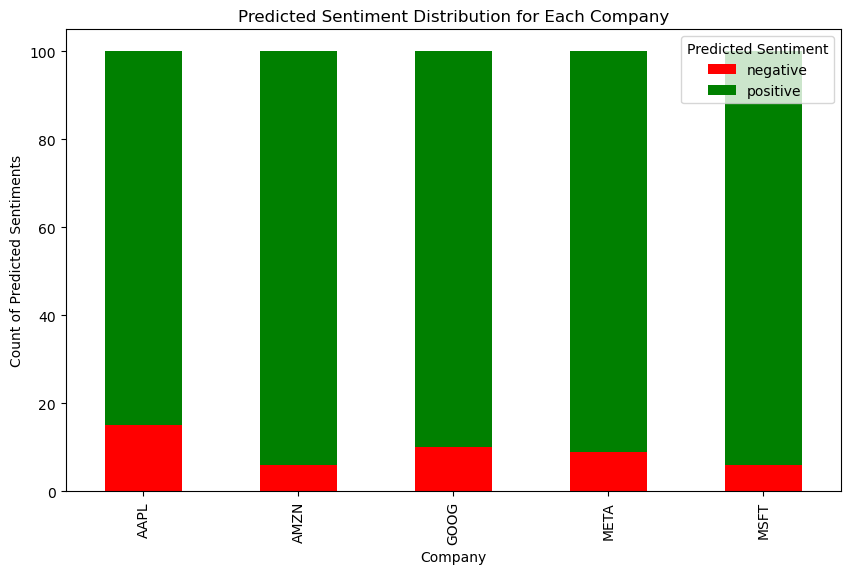

In [76]:
sentiment_counts = df_all.groupby(['ticker', 'predicted_sentiment']).size().unstack(fill_value=0)

# Stacked bar plot for sentiment distribution
sentiment_counts.plot(kind='bar', stacked=True, color=['red','green'], figsize=(10, 6))
plt.title('Predicted Sentiment Distribution for Each Company')
plt.xlabel('Company')
plt.ylabel('Count of Predicted Sentiments')
plt.legend(title='Predicted Sentiment')
plt.show()

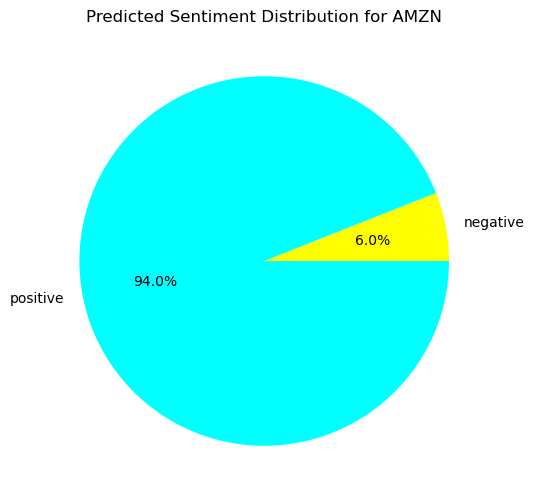

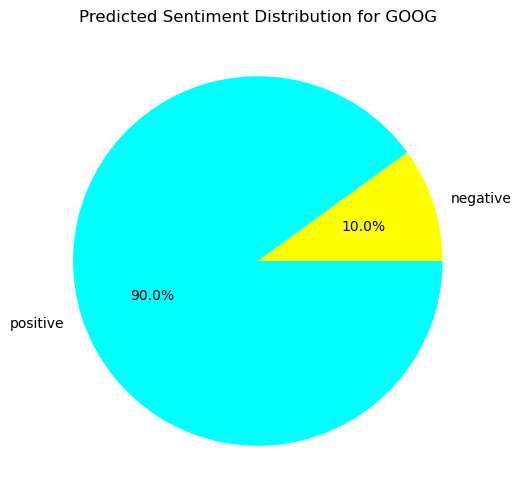

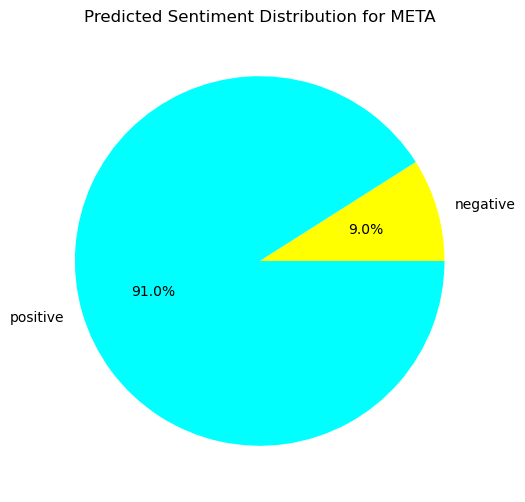

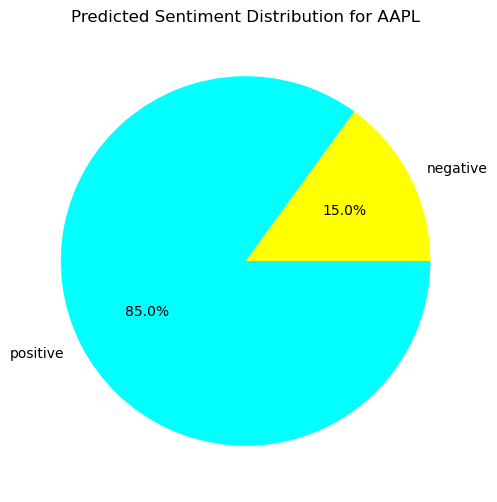

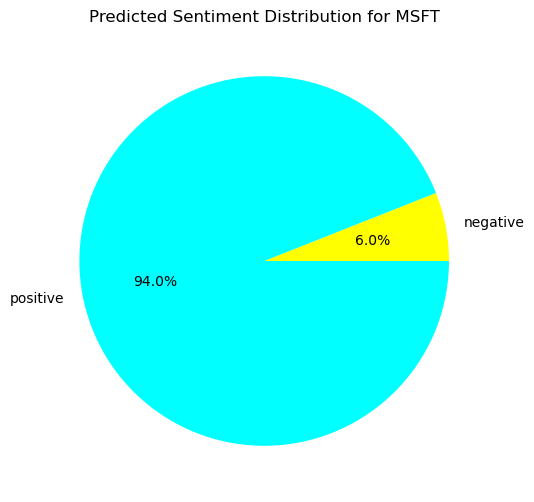

In [77]:
for company in df['ticker'].unique():
    plt.figure(figsize=(6, 6))
    plt.title(f'Predicted Sentiment Distribution for {company}')
    sentiment_counts.loc[company].plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'cyan'])
    plt.ylabel('')  # Hide y-label for aesthetic
    plt.show()

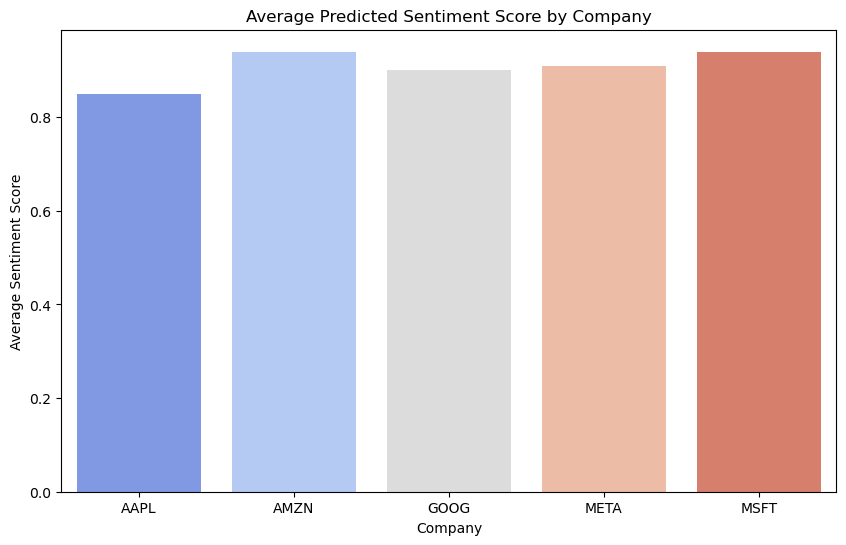

In [78]:
score_mapping = {'positive': 1, 'negative': 0}
df_all['sentiment_score'] = df_all['predicted_sentiment'].map(score_mapping)

# Calculate the average sentiment score for each company
average_scores = df_all.groupby('ticker')['sentiment_score'].mean()

# Bar plot of average sentiment score by company
plt.figure(figsize=(10, 6))
sns.barplot(x=average_scores.index, y=average_scores.values, palette='coolwarm')
plt.title('Average Predicted Sentiment Score by Company')
plt.xlabel('Company')
plt.ylabel('Average Sentiment Score')
plt.show()